# competition - big sales mart 

In [123]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv("C://Users//Rachit//Desktop//great learning - data science engineering//machine learning//big sales mart//Train.csv")
test = pd.read_csv("C://Users//Rachit//Desktop//great learning - data science engineering//machine learning//big sales mart//Test_u94Q5KV.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
x = train.shape
y = test.shape
print(x,y)

(8523, 12) (5681, 11)


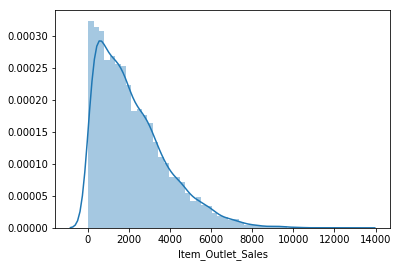

In [9]:
# Target Variable - Outlet Sales | Univariate Analysis
sns.distplot(train.Item_Outlet_Sales)

In [10]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [11]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
a = pd.notnull(train.Item_Weight)

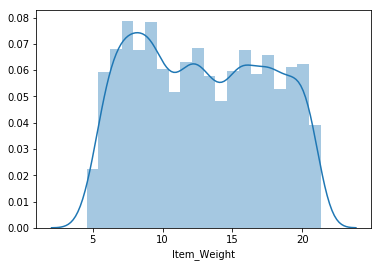

In [13]:
sns.distplot(train[a]["Item_Weight"])

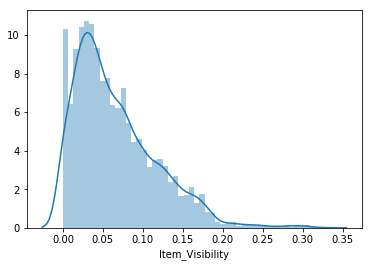

In [14]:
sns.distplot(train.Item_Visibility)

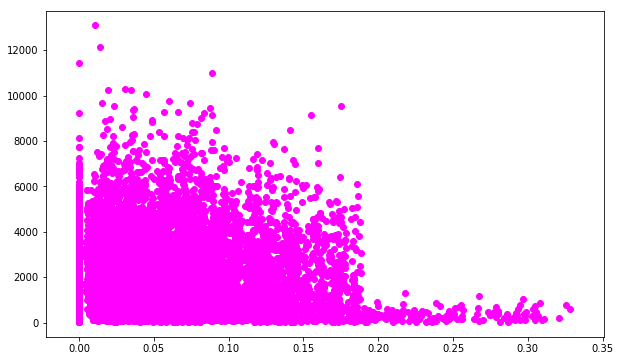

In [15]:
plt.figure(figsize=[10, 6])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = 'magenta')

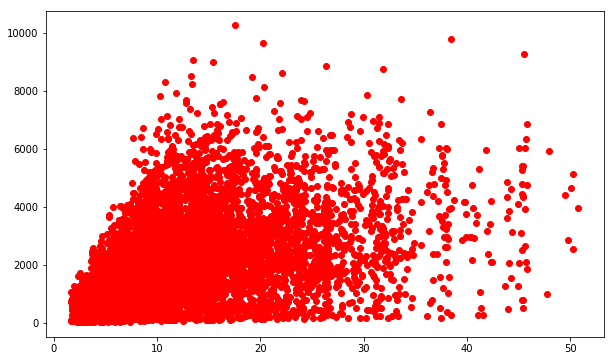

In [16]:
# Plot MRP vs Outlet Sales
plt.figure(figsize=[10, 6])
plt.scatter(train.Item_MRP/train.Item_Weight, 
            train.Item_Outlet_Sales, color = "red")

In [17]:
# creating a new variable called price_per_unit
train["Price_Per_Unit"] = train.Item_MRP/train.Item_Weight
test["Price_Per_Unit"] = test.Item_MRP/test.Item_Weight

In [18]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [53]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_Per_Unit,Item_id
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178,FD
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,2793,Tier 2,Supermarket Type1,10.520458,FD
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,2793,Tier 3,Grocery Store,16.558479,NC
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,2793,Tier 2,Supermarket Type1,21.193985,FD
4,FDY38,12.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,12.740000,FD


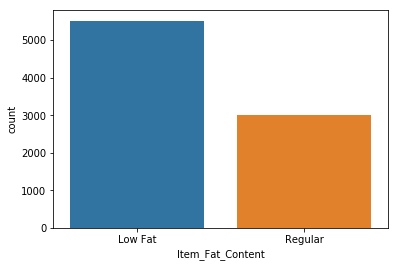

In [23]:
# Item Fat Content
sns.countplot(train.Item_Fat_Content)

In [23]:
# making copy of train
train_copy = train

In [21]:
# Merging lf, lowfat and reg in LowFat and Regular | Train
train.Item_Fat_Content.replace(to_replace=["LF", "low fat", "reg"], 
                        value = ["Low Fat", "Low Fat", "Regular"], 
                               inplace = True)

In [22]:
# Merging lf, lowfat and reg in LowFat and Regular | Test
test.Item_Fat_Content.replace(to_replace=["LF", "low fat", "reg"], 
                        value = ["Low Fat", "Low Fat", "Regular"], 
                               inplace = True)

In [24]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

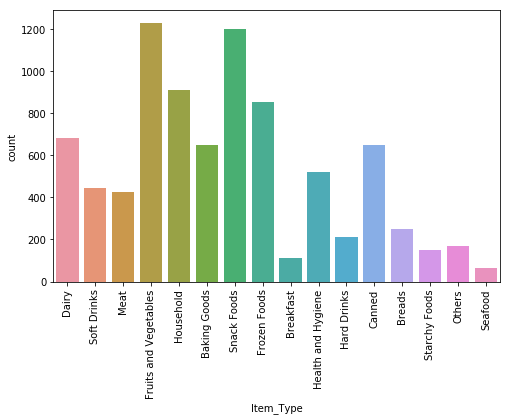

In [25]:
# Item Type
plt.figure(figsize=[8,5])
sns.countplot(train.Item_Type)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

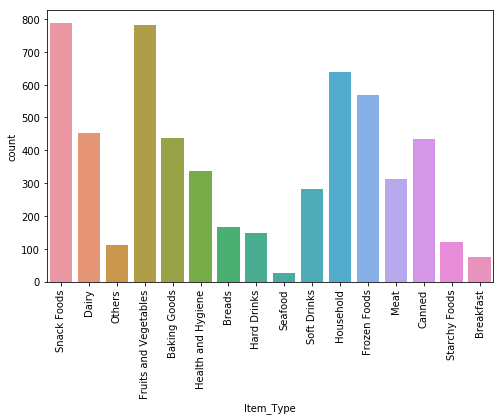

In [26]:
plt.figure(figsize=[8,5])
sns.countplot(test.Item_Type)
plt.xticks(rotation = 90)

In [27]:
print(train.columns)
print(train.shape)
print(test.shape)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Price_Per_Unit'],
      dtype='object')
(8523, 13)
(5681, 12)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

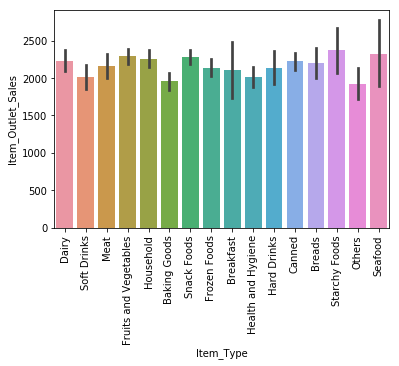

In [28]:
sns.barplot(x = "Item_Type", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

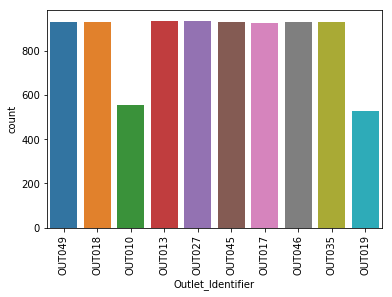

In [29]:
sns.countplot(train.Outlet_Identifier)
plt.xticks(rotation = 90)

# Missing values

In [30]:
# Item Weight and Outlet Size
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [34]:
train.Item_Weight.fillna(value = 12.6, inplace = True)
test.Item_Weight.fillna(value = 12.6, inplace = True)

In [42]:
print(train.isnull().sum())
print(test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Price_Per_Unit               0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Price_Per_Unit               0
dtype: int64


In [35]:
train.Outlet_Size.fillna(value = 2793, inplace = True )
test.Outlet_Size.fillna(value = 2793, inplace = True )

In [36]:
train.Price_Per_Unit.fillna(value = 12.74, inplace = True)
test.Price_Per_Unit.fillna(value = 12.74, inplace = True)


In [39]:
# Item Visibility
test.Item_Visibility.describe()

count    5681.000000
mean        0.069049
std         0.048535
min         0.003591
25%         0.033208
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [38]:
train.Item_Visibility.replace(to_replace=0, value = 0.053931, inplace = True)
test.Item_Visibility.replace(to_replace=0, value = 0.054154, inplace = True)



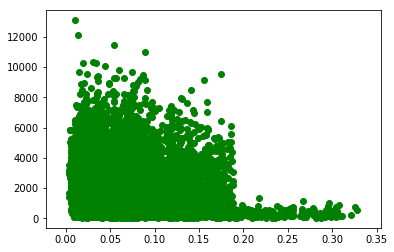

In [41]:
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, c = "Green")

In [44]:
train.Outlet_Size.fillna(value = "Medium", inplace = True)

In [45]:
test.Outlet_Size.fillna(value = "Medium", inplace = True)


In [46]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Price_Per_Unit               0
dtype: int64

In [49]:
# We can Extract first two letters of ID which have significant relation with Type
train.Item_Identifier[4][0:2]

'NC'

In [51]:
itemid = []

for i in range(0, 5681):
    itemid.append(test.Item_Identifier[i][0:2])

In [52]:
test["Item_id"] = pd.Series(itemid)

In [56]:
train["Item_id"] = pd.Series(itemid)

In [57]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [58]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Price_Per_Unit', 'Item_id'],
      dtype='object')

In [59]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Price_Per_Unit', 'Item_id'],
      dtype='object')

In [60]:
# Lets Scales the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [61]:
# Delete the ITem ID from Train and Test
newtrain = train.drop("Item_Identifier", axis = 1)

In [62]:
newtest = test.drop("Item_Identifier", axis = 1)

In [63]:
newtrain = newtrain.drop("Outlet_Establishment_Year", axis  =1)

In [64]:
newtest = newtest.drop("Outlet_Establishment_Year", axis  =1)

In [67]:
# Applying get dummies OHE
ohe_train = pd.get_dummies(newtrain)

In [68]:
ohe_test = pd.get_dummies(newtest)

In [69]:
ohe_train.shape

(8523, 47)

In [70]:
ohe_test.shape

(5681, 46)

In [71]:
# Scale the Dataset
sc =StandardScaler()

In [72]:
scaled_train = pd.DataFrame(sc.fit_transform(ohe_train), 
                            columns=ohe_train.columns)

C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [73]:
scaled_test = pd.DataFrame(sc.fit_transform(ohe_test), 
                            columns=ohe_test.columns)

C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [74]:
scaled_train.shape

(8523, 47)

In [75]:
scaled_test.shape 

(5681, 46)

In [102]:
x = scaled_train.drop("Item_Outlet_Sales", axis = 1)
y = scaled_train.Item_Outlet_Sales

In [103]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [104]:
Regressor = Sequential()

In [105]:
# Adding the input layer and the first hidden layer
Regressor.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))


In [106]:
# Adding the second hidden layer
Regressor.add(Dense(units = 23, kernel_initializer = 'uniform', activation = 'relu'))


In [107]:
# Adding the output layer
Regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))


In [108]:
#Compiling the model
Regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [109]:
# Fitting the ANN to the Training set
Regressor.fit(x, y, batch_size = 10, epochs = 300)

Epoch 1/300
8523/8523 [==============================] - 1s 103us/step - loss: 0.7891 - mean_absolute_error: 0.7891 0s - loss: 0.7897 - mean_absolute_error: 0.78
Epoch 2/300
8523/8523 [==============================] - 1s 73us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 3/300
8523/8523 [==============================] - 1s 73us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 4/300
8523/8523 [==============================] - 1s 70us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 5/300
8523/8523 [==============================] - 1s 75us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 6/300
8523/8523 [==============================] - 1s 73us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 7/300
8523/8523 [==============================] - 1s 77us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 8/300
8523/8523 [==============================] - 1s 68us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 9/300
8523/8523 [==========

8523/8523 [==============================] - 1s 93us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 72/300
8523/8523 [==============================] - 1s 92us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 73/300
8523/8523 [==============================] - 1s 90us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 74/300
8523/8523 [==============================] - 1s 90us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 75/300
8523/8523 [==============================] - 1s 90us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 76/300
8523/8523 [==============================] - 1s 92us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 77/300
8523/8523 [==============================] - 1s 90us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 78/300
8523/8523 [==============================] - 1s 90us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 79/300
8523/8523 [==============================] - 1s 92us/step - loss: 0.7891

8523/8523 [==============================] - 1s 95us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 142/300
8523/8523 [==============================] - 1s 97us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 143/300
8523/8523 [==============================] - 1s 95us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 144/300
8523/8523 [==============================] - 1s 95us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 145/300
8523/8523 [==============================] - 1s 95us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 146/300
8523/8523 [==============================] - 1s 95us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 147/300
8523/8523 [==============================] - 1s 94us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 148/300
8523/8523 [==============================] - 1s 97us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 149/300
8523/8523 [==============================] - 1s 105us/step - los

8523/8523 [==============================] - 1s 110us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 211/300
8523/8523 [==============================] - 1s 103us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 212/300
8523/8523 [==============================] - 1s 108us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 213/300
8523/8523 [==============================] - 1s 103us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 214/300
8523/8523 [==============================] - 1s 103us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 215/300
8523/8523 [==============================] - 1s 101us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 216/300
8523/8523 [==============================] - 1s 103us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 217/300
8523/8523 [==============================] - 1s 105us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 218/300
8523/8523 [==============================] - 1s 103us/st

8523/8523 [==============================] - 1s 101us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 280/300
8523/8523 [==============================] - 1s 101us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 281/300
8523/8523 [==============================] - 1s 105us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 282/300
8523/8523 [==============================] - 1s 101us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 283/300
8523/8523 [==============================] - 1s 99us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 284/300
8523/8523 [==============================] - 1s 103us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 285/300
8523/8523 [==============================] - 1s 101us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 286/300
8523/8523 [==============================] - 1s 101us/step - loss: 0.7891 - mean_absolute_error: 0.7891
Epoch 287/300
8523/8523 [==============================] - 1s 101us/ste

In [111]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
pred = Regressor.predict(scaled_test)



In [112]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [113]:
save = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

In [114]:
sale = sc.inverse_transform(pred)

In [115]:
print(sale)

[[2181.2888]
 [2181.2888]
 [2181.2888]
 ...
 [2181.2888]
 [2181.2888]
 [2181.2888]]


In [125]:
rf = RandomForestRegressor()

In [126]:
model = rf.fit(x,y).predict(scaled_test)

C:\Users\Rachit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [127]:
model

array([-0.36836434, -0.35876596, -0.97649619, ..., -0.39680834,
        0.86545737, -0.21638991])

In [128]:
save = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

In [130]:
sale2 = sc.inverse_transform(model)

In [131]:
sale2

array([1552.71218, 1569.09086,  514.9963 , ..., 1504.17536, 3658.10494,
       1812.04128])

In [133]:
# Sales Dataframe
solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": sale2})

In [134]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1552.71218
1,FDW14,OUT017,1569.09086
2,NCN55,OUT010,514.99630
3,FDQ58,OUT017,2023.49936
4,FDY38,OUT027,6878.18006


In [135]:
solution.to_csv("RF87.csv", index = False)
